In [1]:
import pandas as pd
import pd_explain

usetex-False


In [2]:
adults = pd.read_csv(r"../Datasets/adult.csv")
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


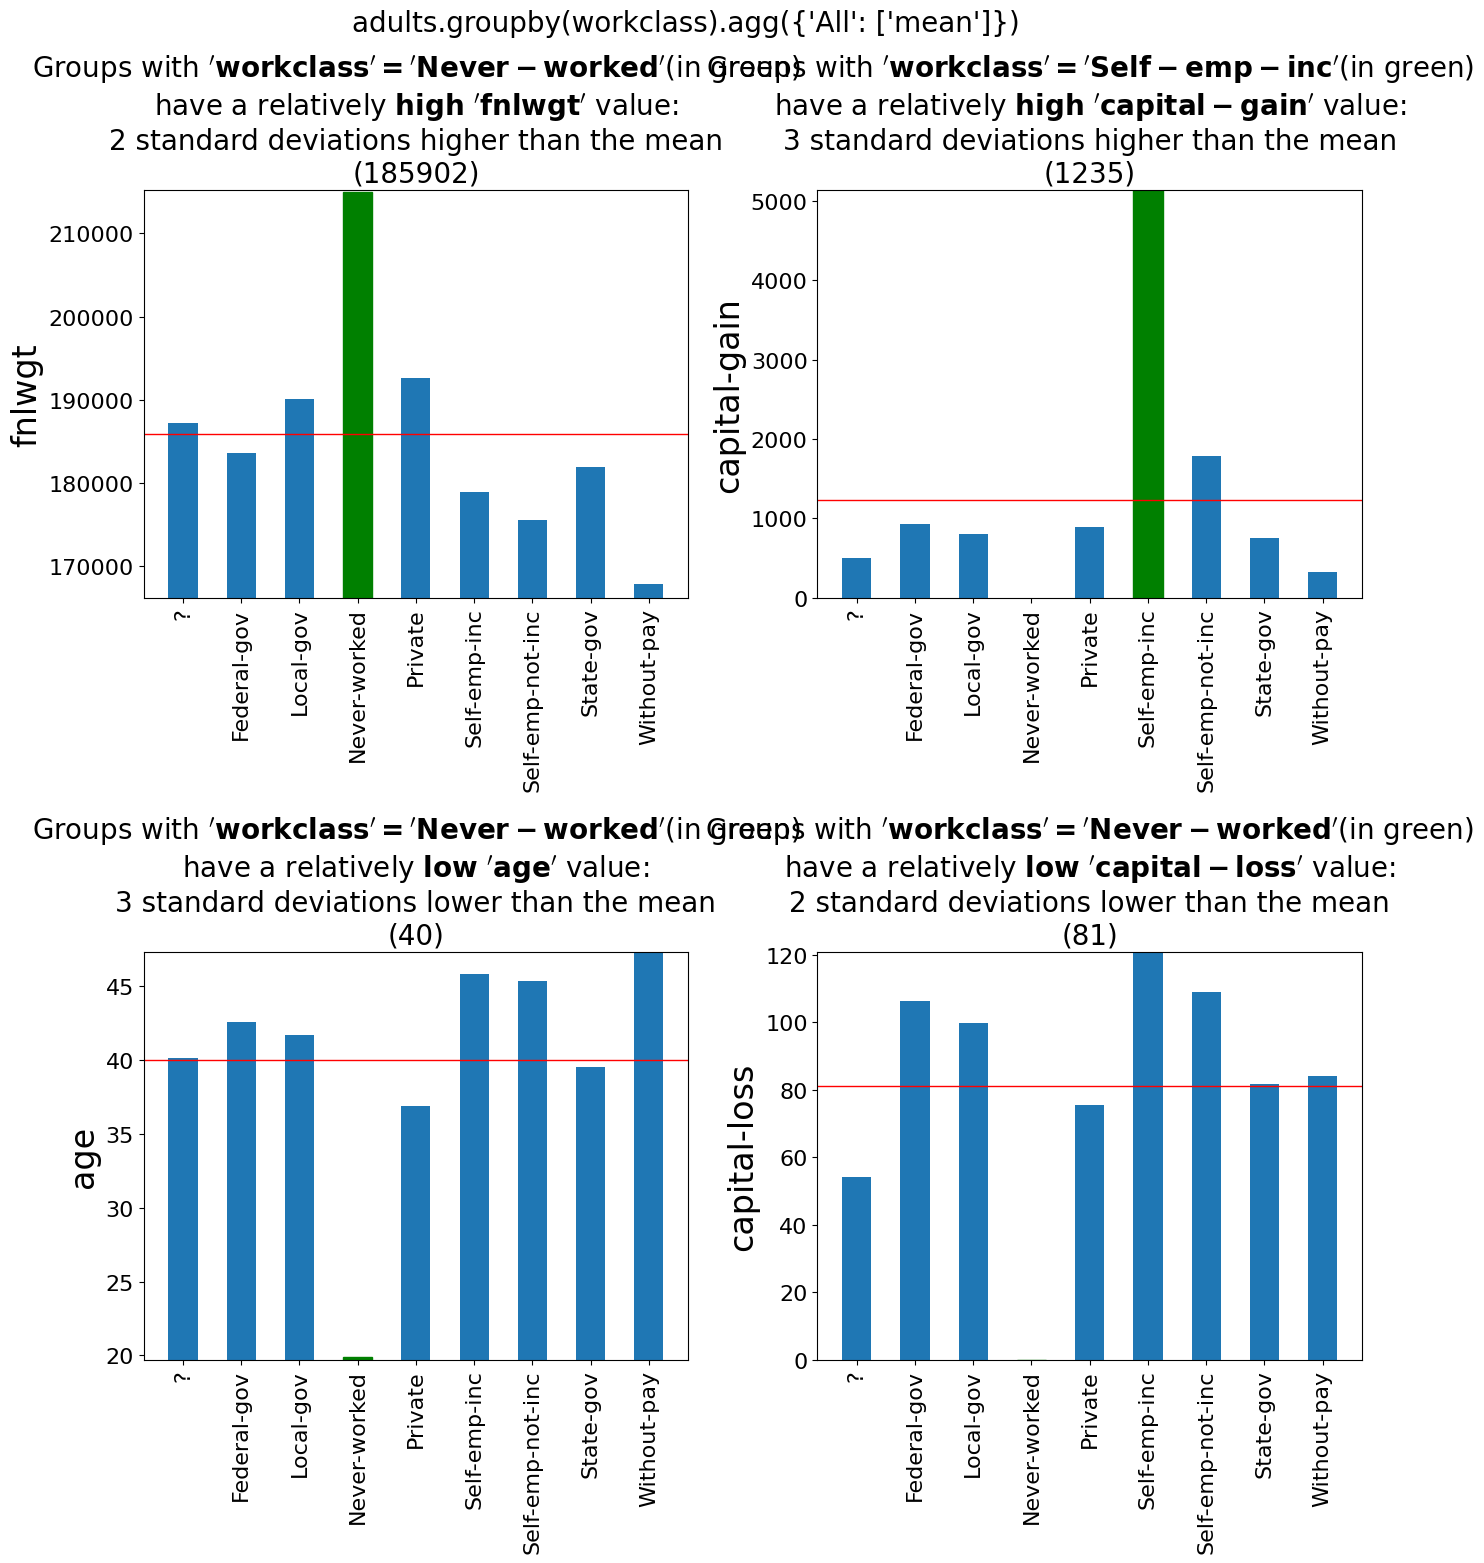

In [3]:
by_income = adults.groupby('workclass').mean()
by_income.explain(top_k=4, use_sampling=True)

In [4]:
low_income = adults[adults['label'] == '<=50K']

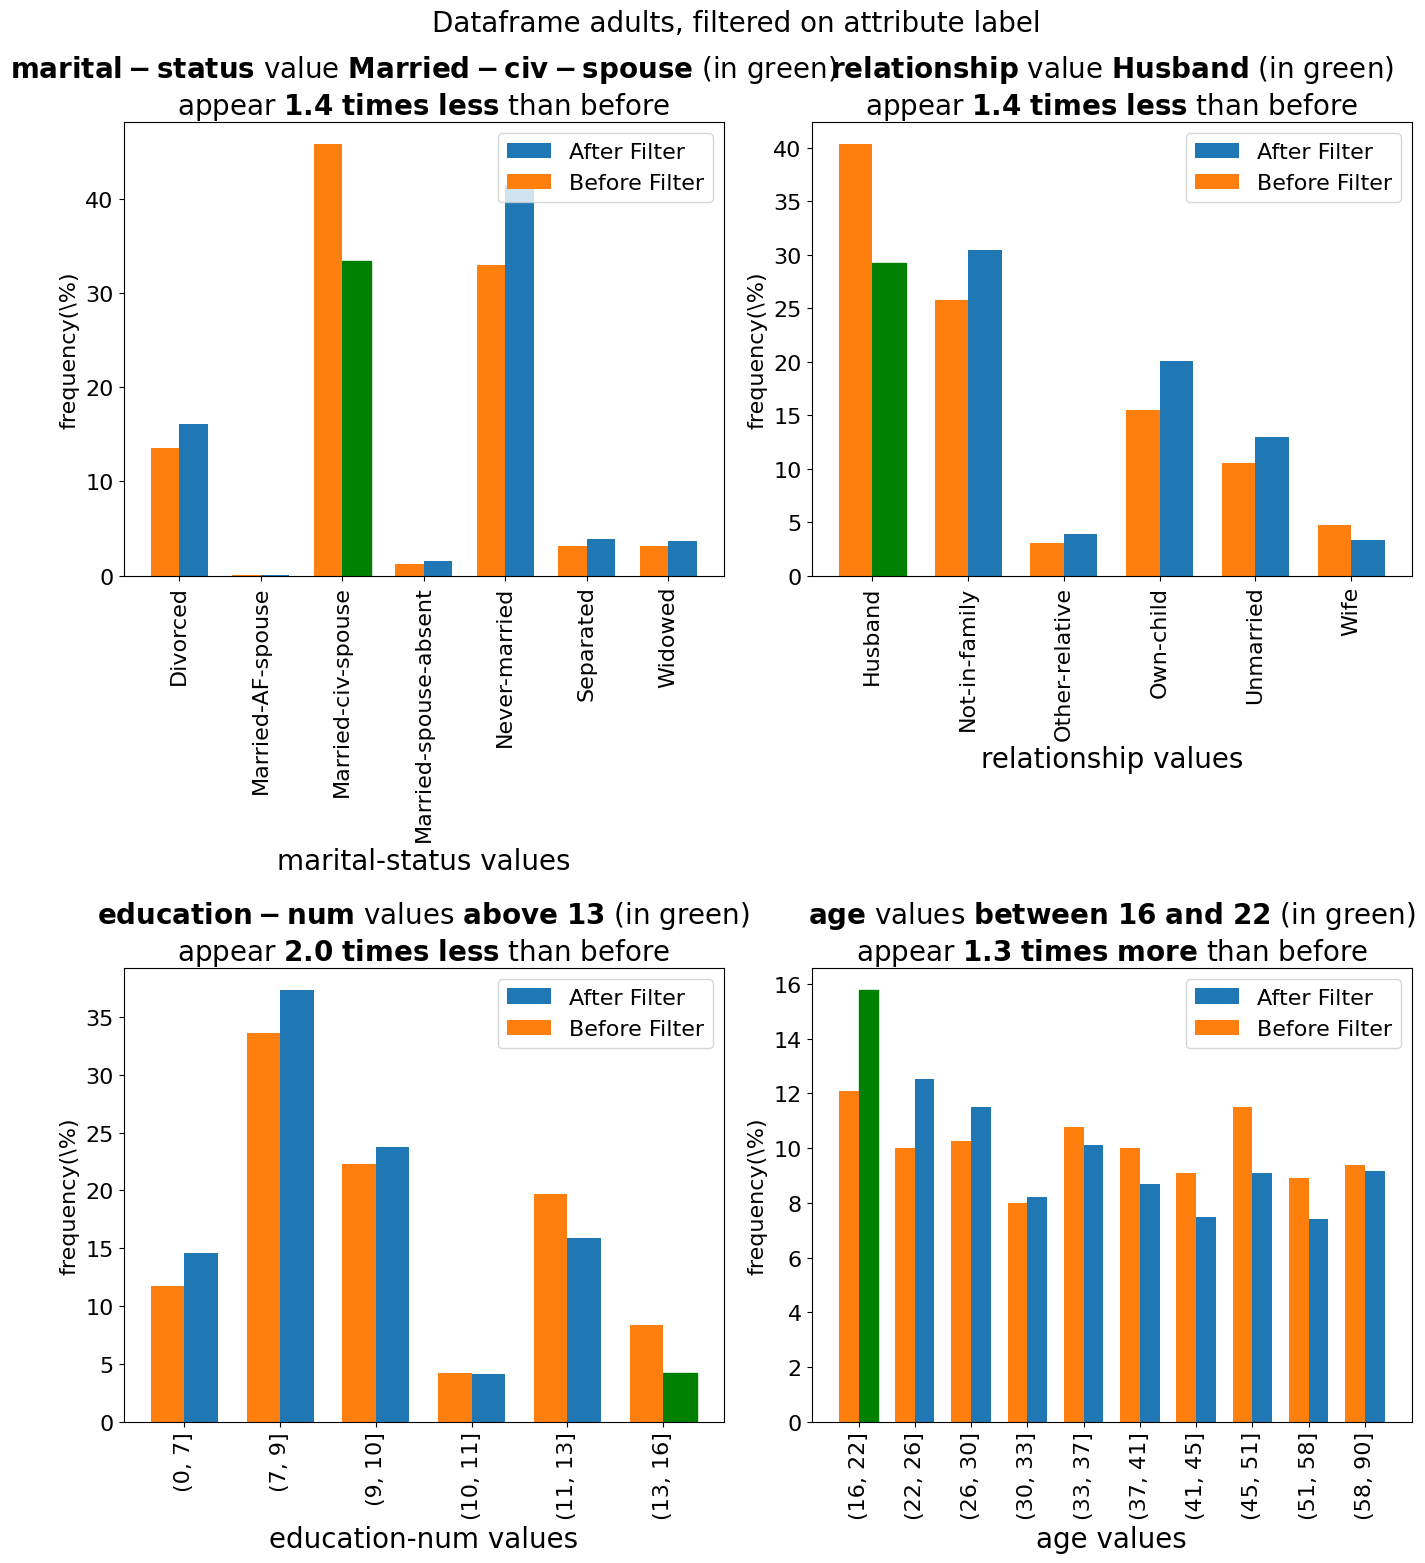

In [5]:
low_income.explain(top_k=4)

In [7]:
thirties = adults[(adults['age'] >= 70)]
thirties['label'].value_counts()

label
<=50K    825
>50K     176
Name: count, dtype: int64

In [8]:
young_by_income = thirties.groupby('education').age.count()
young_by_income

education
10th             45
11th             27
12th              7
1st-4th          17
5th-6th          32
7th-8th         100
9th              29
Assoc-acdm       13
Assoc-voc        31
Bachelors       115
Doctorate        23
HS-grad         320
Masters          49
Preschool         3
Prof-school      36
Some-college    154
Name: age_count, dtype: int64

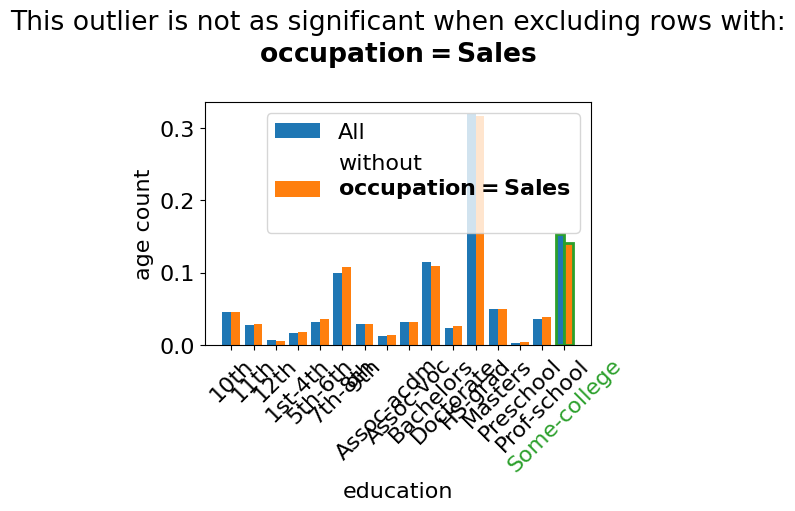

In [9]:
young_by_income.explain(explainer='outlier', target='Some-college', dir='high')